MODEL 3

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

from keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv(r"data/data.csv")
print(data.shape)
print("Features count:",data.shape[1])
print("Raw count:",data.shape[0])

data.head()

(6420, 3)
Features count: 3
Raw count: 6420


,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [3]:
label_encoder = preprocessing.LabelEncoder()
  
data['label']= label_encoder.fit_transform(data['label'])

In [4]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [5]:
vocab_size = 5000
embedding_dim = 8
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 5000

In [6]:
sentences = []
labels = []

for item in range(data.shape[0]):
    sentences.append(data["tweet"][item])
    labels.append(data["label"][item])

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
modelagirlikilk = model.get_weights()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 8)            40000     
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 40,241
Trainable params: 40,241
Non-trainable params: 0
_________________________________________________________________


In [48]:
filepath = 'eachModel5/CheckPoint-{epoch:02d}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1,
    save_best_only=False,save_weights_only=False, mode='auto', save_freq='epoch')

In [49]:
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2,callbacks=[checkpoint])

Epoch 1/15

Epoch 1: saving model to eachModel5\CheckPoint-01.hdf5
157/157 - 2s - loss: 0.6749 - accuracy: 0.6166 - val_loss: 0.6222 - val_accuracy: 0.8394 - 2s/epoch - 11ms/step
Epoch 2/15

Epoch 2: saving model to eachModel5\CheckPoint-02.hdf5
157/157 - 1s - loss: 0.5141 - accuracy: 0.8308 - val_loss: 0.4106 - val_accuracy: 0.8606 - 553ms/epoch - 4ms/step
Epoch 3/15

Epoch 3: saving model to eachModel5\CheckPoint-03.hdf5
157/157 - 1s - loss: 0.3376 - accuracy: 0.8756 - val_loss: 0.2967 - val_accuracy: 0.8831 - 673ms/epoch - 4ms/step
Epoch 4/15

Epoch 4: saving model to eachModel5\CheckPoint-04.hdf5
157/157 - 1s - loss: 0.2458 - accuracy: 0.9102 - val_loss: 0.2500 - val_accuracy: 0.8993 - 569ms/epoch - 4ms/step
Epoch 5/15

Epoch 5: saving model to eachModel5\CheckPoint-05.hdf5
157/157 - 1s - loss: 0.1972 - accuracy: 0.9280 - val_loss: 0.2224 - val_accuracy: 0.9070 - 583ms/epoch - 4ms/step
Epoch 6/15

Epoch 6: saving model to eachModel5\CheckPoint-06.hdf5
157/157 - 1s - loss: 0.1641 - 

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers

class RandomCoordinates(object):
    def __init__(self, origin):
        self.origin_ = origin
        self.v0_ = normalize_weights(
            [np.random.normal(size=w.shape) for w in origin], origin
        )
        self.v1_ = normalize_weights(
            [np.random.normal(size=w.shape) for w in origin], origin
        )

    def __call__(self, a, b):
        return [
            a * w0 + b * w1 + wc
            for w0, w1, wc in zip(self.v0_, self.v1_, self.origin_)
        ]


def normalize_weights(weights, origin):
    return [
        w * np.linalg.norm(wc) / np.linalg.norm(w)
        for w, wc in zip(weights, origin)
    ]


class LossSurface(object):
    def __init__(self, model, inputs, outputs):
        self.model_ = model
        self.inputs_ = inputs
        self.outputs_ = outputs

    def compile(self, range, points, coords):
        a_grid = tf.linspace(-1.0, 1.0, num=points) ** 3 * range
        b_grid = tf.linspace(-1.0, 1.0, num=points) ** 3 * range
        loss_grid = np.empty([len(a_grid), len(b_grid)])
        for i, a in enumerate(a_grid):
            for j, b in enumerate(b_grid):
                self.model_.set_weights(coords(a, b))
                loss = self.model_.test_on_batch(
                    self.inputs_, self.outputs_, return_dict=True
                )["loss"]
                loss_grid[j, i] = loss
        self.model_.set_weights(coords.origin_)
        self.a_grid_ = a_grid
        self.b_grid_ = b_grid
        self.loss_grid_ = loss_grid

    def plot(self, range=1.0, points=24, levels=20, ax=None, **kwargs):
        xs = self.a_grid_
        ys = self.b_grid_
        zs = self.loss_grid_
        if ax is None:
            _, ax = plt.subplots(**kwargs)
            ax.set_title("The Loss Surface")
            ax.set_aspect("equal")
        # Set Levels
        min_loss = zs.min()
        max_loss = zs.max()
        levels = tf.exp(
            tf.linspace(
                tf.math.log(min_loss), tf.math.log(max_loss), num=levels
            )
        )
        # Create Contour Plot
        CS = ax.contour(
            xs,
            ys,
            zs,
            levels=levels,
            cmap="magma",
            linewidths=0.75,
        )
        ax.clabel(CS, inline=True, fontsize=8, fmt="%1.2f")
        return ax

<AxesSubplot:title={'center':'The Loss Surface'}>

<Figure size 600x400 with 0 Axes>

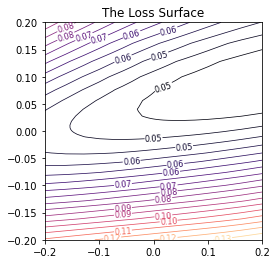

In [105]:
coords = RandomCoordinates(model.get_weights())
loss_surface = LossSurface(model, training_padded, training_labels)
loss_surface.compile(points=30, coords=coords,range=0.2)

# Look at loss surface
plt.figure(dpi=100)
loss_surface.plot()

In [108]:
import landscapeviz

In [109]:
landscapeviz.build_mesh(model, (training_padded, training_labels), grid_length=40, verbose=0)
landscapeviz.plot_contour(key="sparse_categorical_crossentropy")
landscapeviz.plot_3d(key="sparse_categorical_crossentropy")

KeyError: "Unable to open object (object 'sparse_categorical_crossentropy' doesn't exist)"

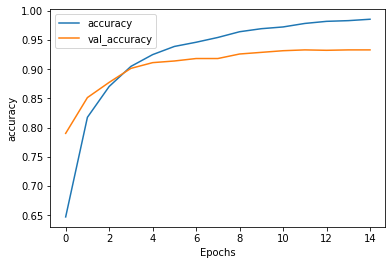

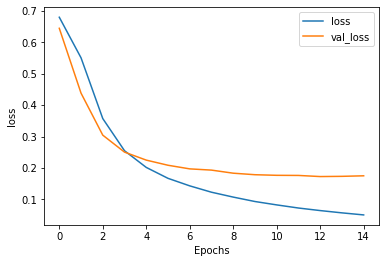

In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

B şıkkının çözümü

In [137]:
allPointWeightX1 = []
allPointWeightY1 = []

In [138]:
for j in range(5):
    for i in range(15):
        if i>=9:
            myModel = load_model('eachModel{}/CheckPoint-{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightX1.append(np.array(myModelweight[0:4]))
        else:
            myModel = load_model('eachModel{}/CheckPoint-0{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightX1.append(np.array(myModelweight[0:4]))
    
    for i in range(15):
        if i>=9:
            myModel = load_model('eachModel{}/CheckPoint-{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightY1.append(np.array(myModelweight[4]))
        else:
            myModel = load_model('eachModel{}/CheckPoint-0{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightY1.append(np.array(myModelweight[4]))

C:\Users\enes_\AppData\Local\Temp\ipykernel_4544\3969716254.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allPointWeightX1.append(np.array(myModelweight[0:4]))
C:\Users\enes_\AppData\Local\Temp\ipykernel_4544\3969716254.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allPointWeightX1.append(np.array(myModelweight[0:4]))


In [139]:
allPointWeightX1 = np.array(allPointWeightX1)
allPointWeightY1 = np.array(allPointWeightY1)

In [140]:
for i in range(75):
    allPointWeightX1[i][0] = allPointWeightX1[i][0].flatten()
    allPointWeightX1[i][1] = allPointWeightX1[i][1].flatten()
    allPointWeightX1[i][2] = allPointWeightX1[i][2].flatten()
    allPointWeightX1[i][3] = allPointWeightX1[i][3].flatten()

In [141]:
allPointWeightX1[0][0].shape

(40000,)

In [143]:
birdeneme = np.hstack((allPointWeightX1[0][0],allPointWeightX1[0][1],allPointWeightX1[0][2],allPointWeightX1[0][3]))

In [144]:
Xlist= []
for i in range(75):
    Xlist.append(np.hstack((allPointWeightX1[i][0],allPointWeightX1[i][1],allPointWeightX1[i][2],allPointWeightX1[i][3])))

In [145]:
Xlist = np.array(Xlist)

In [146]:
Xlist.shape

(75, 40240)

In [147]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(Xlist)

c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 74 nearest neighbors...
[t-SNE] Indexed 75 samples in 0.006s...
[t-SNE] Computed neighbors for 75 samples in 0.239s...
[t-SNE] Computed conditional probabilities for sample 75 / 75
[t-SNE] Mean sigma: 25.529296
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.639236
[t-SNE] KL divergence after 1000 iterations: 0.220008


In [148]:
df = pd.DataFrame()
df["y"] = pd.DataFrame(allPointWeightY1)
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[Text(0.5, 1.0, 'Farklı başlangıç noktaları için model adımları gösterimi')]

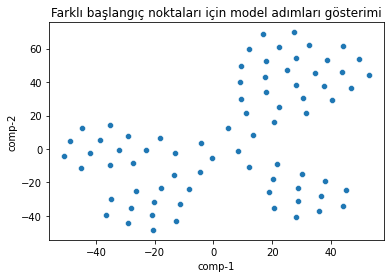

In [149]:
sns.scatterplot(x="comp-1", y="comp-2",
        data=df).set(title="Farklı başlangıç noktaları için model adımları gösterimi")

In [151]:
w0 = load_model('eachModel1/CheckPoint-15.hdf5')
firstWeight = w0.get_weights()
w0.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)
w0acc = w0.history.history['accuracy'][0]
w0test = (w0.evaluate(testing_padded, testing_labels))[1]

wT = load_model('eachModel4/CheckPoint-15.hdf5'.format(z))
lastWeight = wT.get_weights()
wT.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)
wTacc = wT.history.history['accuracy'][0]
wTtest = (wT.evaluate(testing_padded, testing_labels))[1]

157/157 - 1s - loss: 0.0511 - accuracy: 0.9862 - val_loss: 0.1746 - val_accuracy: 0.9338 - 1s/epoch - 7ms/step
45/45 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9338
157/157 - 1s - loss: 0.0421 - accuracy: 0.9898 - val_loss: 0.1757 - val_accuracy: 0.9345 - 1s/epoch - 7ms/step
45/45 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.9345


In [156]:
denemefirst = np.array(firstWeight)
denemelast =  np.array(lastWeight)
denemesonuc = denemefirst - denemelast
newdeneme = denemesonuc/11

C:\Users\enes_\AppData\Local\Temp\ipykernel_4544\3483842718.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  denemefirst = np.array(firstWeight)
C:\Users\enes_\AppData\Local\Temp\ipykernel_4544\3483842718.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  denemelast =  np.array(lastWeight)


In [157]:
firsrpoint = denemefirst+newdeneme

In [63]:

w0 = load_model('eachModel1/CheckPoint-15.hdf5')
firstWeight = w0.get_weights()
w0.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)
w0acc = w0.history.history['accuracy'][0]
w0test = (w0.evaluate(testing_padded, testing_labels))[1]

wT = load_model('eachModel2/CheckPoint-15.hdf5'.format(z))
lastWeight = wT.get_weights()
wT.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)
wTacc = wT.history.history['accuracy'][0]
wTtest = (wT.evaluate(testing_padded, testing_labels))[1]

ilkK = (firstWeight[0] - lastWeight[0])/11
ikiK = (firstWeight[1] - lastWeight[1])/11
ucK = (firstWeight[2] - lastWeight[2])/11
dortK = (firstWeight[3] - lastWeight[3])/11
besK = (firstWeight[4] - lastWeight[4])/11

arttirmaMiktar = [ilkK,ikiK,ucK,dortK,besK]

allpointX = []
allpointY = []
for i in range(11):
        allpointX.append(firstWeight[3] + ((i+1)*arttirmaMiktar[3]))

for i in range(11):
        allpointY.append(firstWeight[4] + ((i+1)*arttirmaMiktar[4]))

157/157 - 1s - loss: 0.0471 - accuracy: 0.9878 - val_loss: 0.1860 - val_accuracy: 0.9331 - 992ms/epoch - 6ms/step
45/45 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9331
157/157 - 1s - loss: 0.0393 - accuracy: 0.9914 - val_loss: 0.1794 - val_accuracy: 0.9338 - 917ms/epoch - 6ms/step
45/45 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9338


In [64]:
allPointWeightX1.extend(allpointX)
allPointWeightY1.extend(allpointY)

In [65]:
allPointWeightX1 = np.array(allPointWeightX1)
allPointWeightY1 = np.array(allPointWeightY1)

In [66]:
allPointWeightX1.shape

(86, 24, 1)

In [67]:
x_mnist = np.reshape(allPointWeightX1, [allPointWeightX1.shape[0], allPointWeightX1.shape[1]*allPointWeightX1.shape[2]])

In [68]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)

c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 86 samples in 0.001s...
[t-SNE] Computed neighbors for 86 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 86 / 86
[t-SNE] Mean sigma: 3.693257
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.155327
[t-SNE] KL divergence after 1000 iterations: 0.051902


In [69]:
df = pd.DataFrame()
df["y"] = pd.DataFrame(allPointWeightY1)
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[Text(0.5, 1.0, 'Farklı başlangıç noktaları için model adımları gösterimi')]

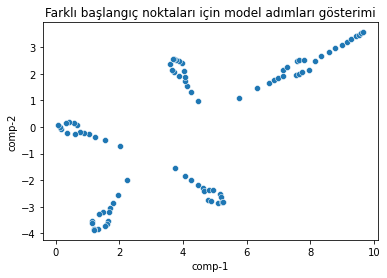

In [70]:
sns.scatterplot(x="comp-1", y="comp-2",
        data=df).set(title="Farklı başlangıç noktaları için model adımları gösterimi")

C ŞIKKININ ÇÖZÜMÜ

In [71]:
trainResultLastModels = []
testResultLastModels = []

In [72]:
for z in range(2,5):
    w0 = load_model('eachModel1/CheckPoint-15.hdf5')
    firstWeight = w0.get_weights()
    w0.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)
    w0acc = w0.history.history['accuracy'][0]
    w0test = (w0.evaluate(testing_padded, testing_labels))[1]

    wT = load_model('eachModel{}/CheckPoint-15.hdf5'.format(z))
    lastWeight = wT.get_weights()
    wT.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)
    wTacc = wT.history.history['accuracy'][0]
    wTtest = (wT.evaluate(testing_padded, testing_labels))[1]

    ilkK = (firstWeight[0] - lastWeight[0])/11
    ikiK = (firstWeight[1] - lastWeight[1])/11
    ucK = (firstWeight[2] - lastWeight[2])/11
    dortK = (firstWeight[3] - lastWeight[3])/11
    besK = (firstWeight[4] - lastWeight[4])/11

    arttirmaMiktar = [ilkK,ikiK,ucK,dortK,besK]

    allpoint = []
    for i in range(11):
        for j in range(5):
            allpoint.append(firstWeight[j] + ((i+1)*arttirmaMiktar[j]))

    
    trainResultLastModels.append(w0acc )
    testResultLastModels.append(w0test)

    for i in range(0,55,5):
        model.set_weights(allpoint[i:(i+5)])
        dotModel = model.fit(training_padded, training_labels, epochs=1, validation_data=(testing_padded, testing_labels), verbose=2)
        dotResult = model.evaluate(testing_padded, testing_labels)

        trainResultLastModels.append(dotModel.history['accuracy'][0] )
        testResultLastModels.append(dotResult[1])

    trainResultLastModels.append(wTacc )
    testResultLastModels.append(wTtest)

157/157 - 1s - loss: 0.0475 - accuracy: 0.9876 - val_loss: 0.1813 - val_accuracy: 0.9324 - 954ms/epoch - 6ms/step
45/45 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9324
157/157 - 1s - loss: 0.0385 - accuracy: 0.9908 - val_loss: 0.1775 - val_accuracy: 0.9338 - 1s/epoch - 7ms/step
45/45 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9338
157/157 - 1s - loss: 0.0389 - accuracy: 0.9888 - val_loss: 0.1879 - val_accuracy: 0.9324 - 541ms/epoch - 3ms/step
45/45 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9324
157/157 - 0s - loss: 0.0349 - accuracy: 0.9868 - val_loss: 0.2078 - val_accuracy: 0.9338 - 434ms/epoch - 3ms/step
45/45 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9338
157/157 - 0s - loss: 0.0346 - accuracy: 0.9878 - val_loss: 0.2260 - val_accuracy: 0.9338 - 465ms/epoch - 3ms/step
45/45 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.933

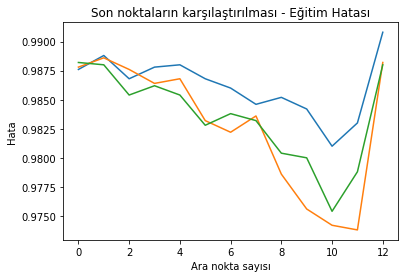

In [73]:
plt.plot(range(13),trainResultLastModels[0:13])
plt.plot(range(13),trainResultLastModels[13:26])
plt.plot(range(13),trainResultLastModels[26:39])
plt.xlabel("Ara nokta sayısı")
plt.ylabel("Hata")
plt.title("Son noktaların karşılaştırılması - Eğitim Hatası")
plt.show()

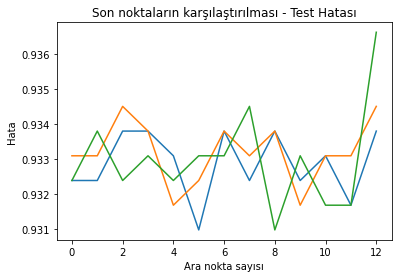

In [74]:
plt.plot(range(13),testResultLastModels[0:13])
plt.plot(range(13),testResultLastModels[13:26])
plt.plot(range(13),testResultLastModels[26:39])
plt.xlabel("Ara nokta sayısı")
plt.ylabel("Hata")
plt.title("Son noktaların karşılaştırılması - Test Hatası")
plt.show()